In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np
from sklearn.metrics import mean_squared_error
df_train = pd.read_csv('TrainData.csv')

# Calculating and creating columns for wind direction

In [52]:
df_train['$\phi$'] = np.arctan(df_train['V10']/df_train['U10'])

In [53]:
def f(row):
    if row['U10'] <= 0 and row['V10'] <= 0:
        val = 2*np.pi - row['$\phi$']
        
    elif row['U10'] > 0 and row['V10'] <= 0:
        val = row['$\phi$']
        
    elif row['U10'] > 0 and row['V10'] > 0:
        val = np.pi - row['$\phi$']
        
    elif row['U10'] <= 0 and row['V10'] > 0:
        val = np.pi + row['$\phi$']
    
    else: val = 99
        
    return val

df_train['$\theta$'] = df_train.apply(f, axis=1)

In [54]:
df_train['hour'] = np.arange(1, 16081, 1)

In [55]:
df_train

,TIMESTAMP,POWER,U10,V10,WS10,U100,V100,WS100,$\phi$,$\theta$,hour
0,20120101 1:00,0.273678,0.534894,-3.660243,3.699120,0.765355,-4.486657,4.551468,-1.425687,-1.425687,1
1,20120101 2:00,0.086796,0.330813,-2.676430,2.696797,0.469875,-3.213752,3.247920,-1.447818,-1.447818,2
2,20120101 3:00,0.006811,-0.065839,-2.029072,2.030140,-0.020893,-2.418119,2.418209,1.538360,4.744825,3
3,20120101 4:00,0.018646,-0.419549,-1.799090,1.847362,-0.444867,-2.149654,2.195203,1.341690,4.941495,4
4,20120101 5:00,0.034812,-0.754224,-1.661526,1.824698,-0.838274,-1.991829,2.161038,1.144675,5.138510,5
...,...,...,...,...,...,...,...,...,...,...,...
16075,20131031 20:00,0.101254,-1.459917,-1.778960,2.301316,-1.974368,-4.936280,5.316483,0.883586,5.399600,16076
16076,20131031 21:00,0.105047,-1.293326,-2.350447,2.682777,-0.781394,-4.903565,4.965433,1.067764,5.215421,16077
16077,20131031 22:00,0.145079,-0.308284,-2.441885,2.461269,0.257905,-4.027432,4.035681,1.445212,4.837973,16078
16078,20131031 23:00,0.180933,1.148765,-2.789011,3.016330,1.628004,-3.520358,3.878572,-1.180082,-1.180082,16079


# Train the model on the training set

In [56]:
x_train = df_train[['WS10', '$\theta$']]
y_train = df_train['POWER']

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Importing test-data and 

In [57]:
WFI = pd.read_csv('WeatherForecastInput.csv')
SOL = pd.read_csv('Solution.csv')

# Creating wind direction columns for test data

In [58]:
WFI['$\phi$'] = np.arctan(WFI['V10']/WFI['U10'])

def f(row):
    if row['U10'] <= 0 and row['V10'] <= 0:
        val = 2*np.pi - row['$\phi$']
        
    elif row['U10'] > 0 and row['V10'] <= 0:
        val = row['$\phi$']
        
    elif row['U10'] > 0 and row['V10'] > 0:
        val = np.pi - row['$\phi$']
        
    elif row['U10'] <= 0 and row['V10'] > 0:
        val = np.pi + row['$\phi$']
    
    else: val = 99
        
    return val

WFI['$\theta$'] = WFI.apply(f, axis=1)

WFI['hour'] = np.arange(1, 721, 1)

In [59]:
WFI

,TIMESTAMP,U10,V10,WS10,U100,V100,WS100,$\phi$,$\theta$,hour
0,20131101 1:00,3.462251,-1.066374,3.622753,4.323671,-1.330859,4.523861,-0.298780,-0.298780,1
1,20131101 2:00,3.651341,-0.337717,3.666925,4.532444,-0.451426,4.554870,-0.092229,-0.092229,2
2,20131101 3:00,3.657829,0.328049,3.672510,4.527268,0.341374,4.540120,0.089445,3.052148,3
3,20131101 4:00,3.551698,0.735371,3.627028,4.395563,0.818799,4.471175,0.204163,2.937430,4
4,20131101 5:00,3.586921,1.050811,3.737673,4.461128,1.251971,4.633475,0.284982,2.856610,5
...,...,...,...,...,...,...,...,...,...,...
715,20131130 20:00,-2.527419,-6.623859,7.089666,-3.648235,-11.876879,12.424567,1.206284,5.076901,716
716,20131130 21:00,-2.529020,-7.423845,7.842794,-3.553146,-12.504219,12.999244,1.242465,5.040721,717
717,20131130 22:00,-3.105103,-6.653005,7.341943,-4.423704,-12.561661,13.317825,1.134124,5.149061,718
718,20131130 23:00,-2.286417,-6.165074,6.575396,-2.957473,-9.009961,9.482934,1.215655,5.067531,719


# Predict power and calculate mse and rmse

In [60]:
x_test = WFI[['WS10', '$\theta$']]
y_test = SOL['POWER']
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.04707583683590081
0.21696966800891965


# 

In [62]:
forecast_template2 = pd.read_csv('ForecastTemplate.csv')
forecast_template2

,TIMESTAMP,FORECAST
0,20131101 1:00,NaN
1,20131101 2:00,NaN
2,20131101 3:00,NaN
3,20131101 4:00,NaN
4,20131101 5:00,NaN
...,...,...
715,20131130 20:00,NaN
716,20131130 21:00,NaN
717,20131130 22:00,NaN
718,20131130 23:00,NaN


In [63]:
forecast_template2['FORECAST'] = y_pred
forecast_template2

,TIMESTAMP,FORECAST
0,20131101 1:00,0.364180
1,20131101 2:00,0.369315
2,20131101 3:00,0.365898
3,20131101 4:00,0.360483
4,20131101 5:00,0.374127
...,...,...
715,20131130 20:00,0.781381
716,20131130 21:00,0.873581
717,20131130 22:00,0.812156
718,20131130 23:00,0.718467


In [64]:
forecast_template2.to_csv('ForecastTemplate2.csv')

# Plots

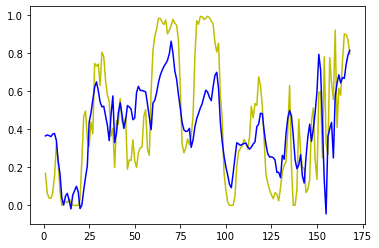

In [61]:
WFI['Predicted Power'] = y_pred
plt.plot(WFI[0:168]['hour'], y_test[0:168], 'y')
plt.plot(WFI[0:168]['hour'], y_pred[0:168], 'blue')
plt.show()